In [2]:
import pandas as pd
import numpy as np

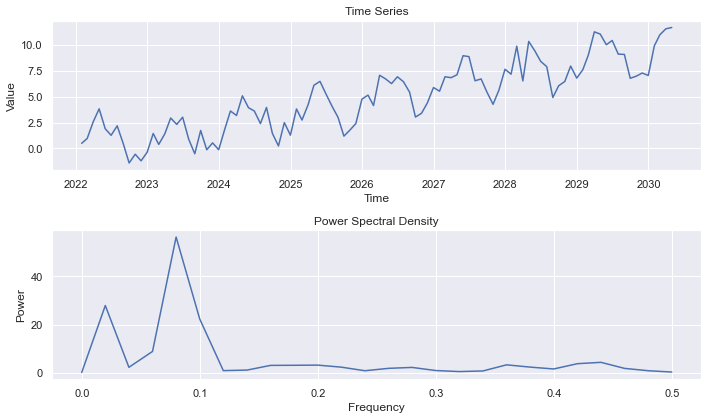

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch

def plot_time_series_and_spectrum(series):
    # Plot the time series
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(series)
    plt.title('Time Series')
    plt.xlabel('Time')
    plt.ylabel('Value')

    # Plot the power spectral density
    freqs, psd = welch(series, nperseg=len(series) // 2)
    plt.subplot(2, 1, 2)
    plt.plot(freqs, psd)
    plt.title('Power Spectral Density')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.tight_layout()
    plt.show()

# Generate the seasonal data (same as before)
np.random.seed(42)
n_samples = 100
seasonal_period = 12  # e.g., monthly data with yearly seasonality
trend_slope = 0.1
seasonal_amplitude = 2
noise_std = 1
time = np.arange(n_samples)
trend = trend_slope * time
seasonal = seasonal_amplitude * np.sin(2 * np.pi * time / seasonal_period)
noise = np.random.normal(0, noise_std, n_samples)
data = trend + seasonal + noise
series = pd.Series(data, index=pd.date_range('2022-01-01', periods=n_samples, freq='M'))

# Plot the time series and spectrum
plot_time_series_and_spectrum(series)

In [3]:
raw_csv_data = pd.read_csv('Index2018.csv')

In [4]:
df_copy = raw_csv_data.copy()

In [5]:
df_copy.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


Scientific papers on the Creat Recession:
15th September 2008
The "Collapse" of Lehman Brothers

In [6]:
raw_csv_data.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [8]:
df_copy.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

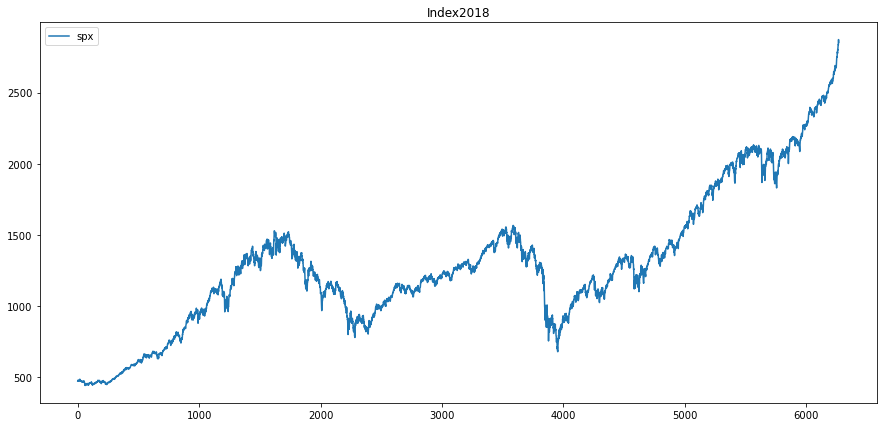

In [10]:
fig = plt.figure(figsize=(15, 7))
plt.plot(df_copy['spx'])
# plt.plot(df_copy['ftse'])
# plt.plot(df_copy['nikkei'])
# plt.plot(df_copy['dax'])
plt.legend(['spx', 'ftse', 'nikkei', 'dax'])
plt.title('Index2018')
plt.show()

QQ plot - quantile quantile plot

In [11]:
import scipy.stats as sp
import pylab

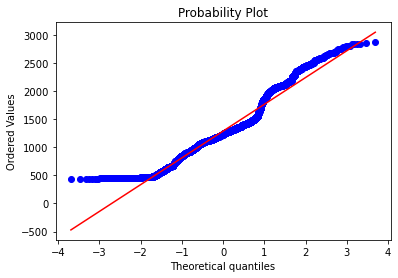

In [12]:
sp.probplot(df_copy['spx'], plot=pylab)
pylab.show()

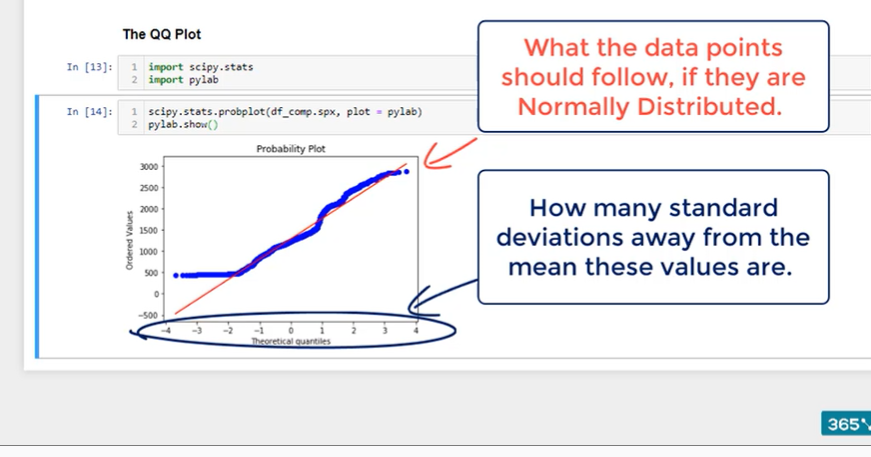

In [13]:
# convert date to datetime
df_copy['date'] = pd.to_datetime(df_copy['date'], dayfirst=True)

In [14]:
df_copy.date.describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

Setting the index

In [15]:
df_copy.set_index('date', inplace=True)

In [16]:
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


Setting the Desired Frequency

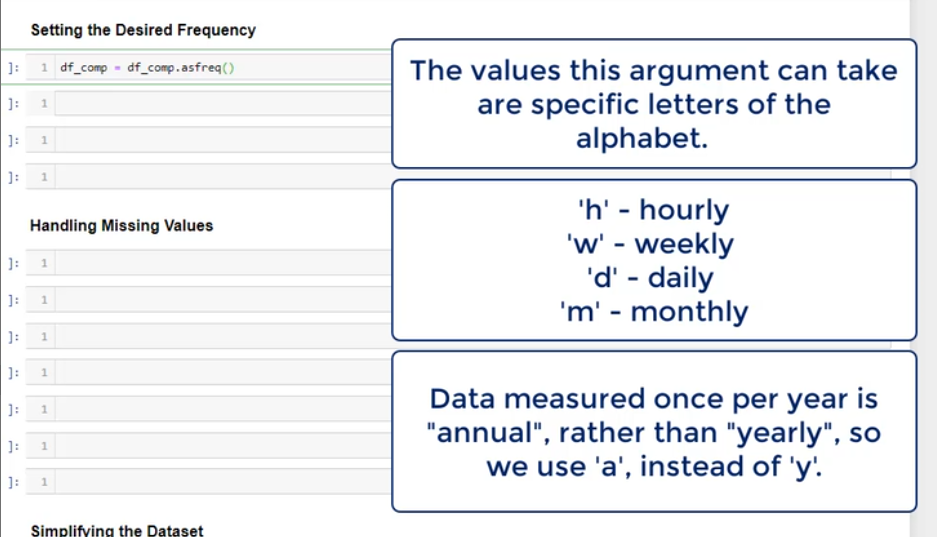

In [17]:
# b -----> business day
df_copy = df_copy.asfreq('d')

df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [18]:
df_copy = df_copy.asfreq('b')

In [19]:
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


Handling missing values

In [20]:
df_copy.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

1) Front filling:
    
    Assigns the value of the previous period

2) Back filling:
    
    Assigns the value of the next period

3) Assigning the same value:
    
    Assigns the average to all the missing values within the time series




In [21]:
df_copy['spx'] = df_copy['spx'].fillna(method='ffill')

In [22]:
df_copy['ftse'] = df_copy['ftse'].fillna(method='bfill')

In [23]:
df_copy['dax'] = df_copy['dax'].fillna(value= df_copy['dax'].mean())

In [24]:
df_copy['nikkei'] = df_copy['nikkei'].fillna(value= df_copy['nikkei'].mean())

Simplifying the Dataset

In [25]:
spx = df_copy.drop(columns=['dax', 'ftse', 'nikkei'])

In [26]:
spx

,spx
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


Splitting the Data

In [27]:
df = spx.iloc[:int(len(spx)*0.8)]
df_test = spx.iloc[int(len(spx)*0.8):]

White Noise:

time series where the data doesn't follow a ceratain pattern

-constant mean
-constant variance
-no autocorrelation

In [28]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

White Noise

In [29]:
wn = np.random.normal(loc = df.mean(), scale = df.std(), size = len(df))

In [30]:
df['wn'] = wn

<ipython-input-30-f05b4814bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [31]:
df.head()

,spx,wn
date,,
1994-01-07,469.90,1254.924331
1994-01-10,475.27,366.998595
1994-01-11,474.13,508.216789
1994-01-12,474.17,1003.356888
1994-01-13,472.47,740.800719


Text(0.5, 1.0, 'White Noise')

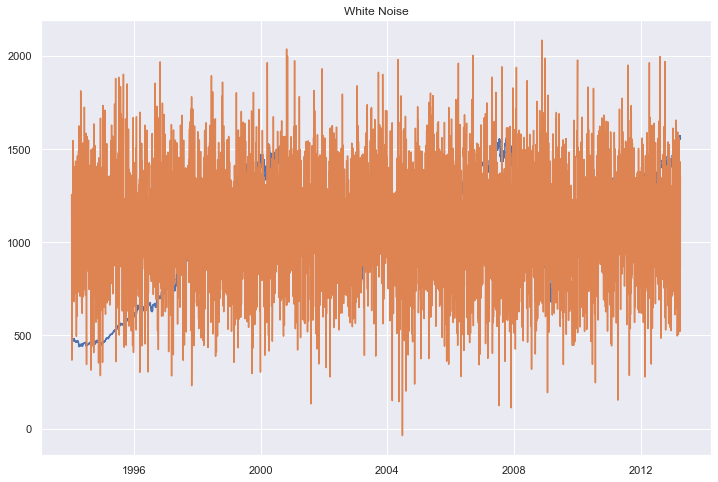

In [32]:
fig2 = plt.figure(figsize=(12,8))
plt.plot(df['spx'])
plt.plot(df['wn'])
plt.title('White Noise')

Random Walk

In [33]:
rw = pd.read_csv('D:\My Things\Eng. Things\My Machine Learning Journey\Time Series\RandWalk.csv\RandWalk.csv')

In [34]:
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw.asfreq('b')

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255
...,...
2013-04-01,2263.675474
2013-04-02,2225.000870
2013-04-03,2190.787688


In [35]:
df['rw'] = rw.price

<ipython-input-35-ef067d009833>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


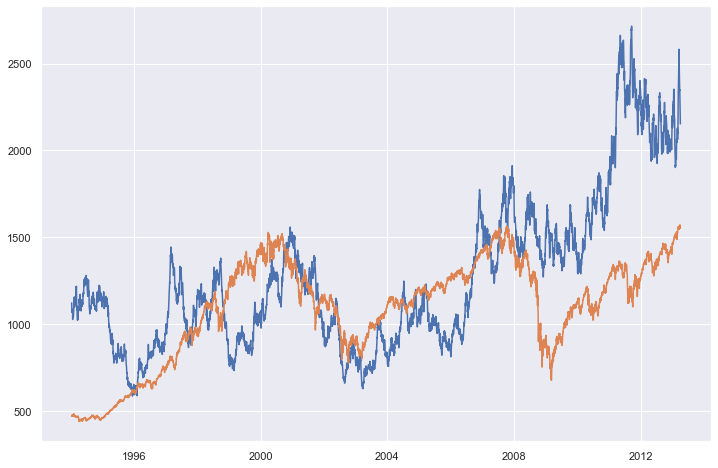

In [36]:
fig3 = plt.figure(figsize=(12,8))
plt.plot(df['rw'])
plt.plot(df['spx'])

Wheter the data is stationary or not, we use a Dickey-Fuller test

Stationarity

In [37]:
sts.adfuller(df['spx'])

(-1.7369847452352436,
 0.4121645696770623,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

Those numbers are critical points from the dickey-fuller table

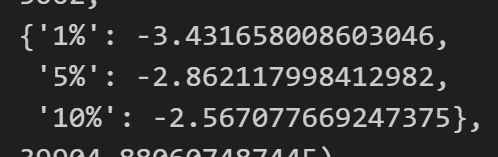

In [38]:
sts.adfuller(df['wn'])

(-70.1700569169207,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70704.74837040095)

In [39]:
sts.adfuller(df['rw'])  

(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

Seasonality

two main approaches for Naive decomposition


additive:
obs = trend + seasonal + residual

multiplicative:
obs = trend x seasonal x residual



In [40]:
s_dec = seasonal_decompose(df['spx'], model = 'multiplicative')

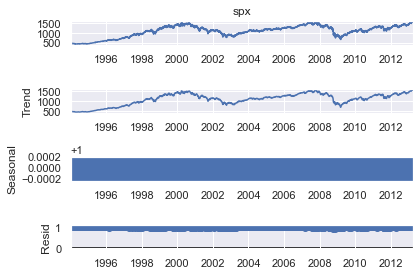

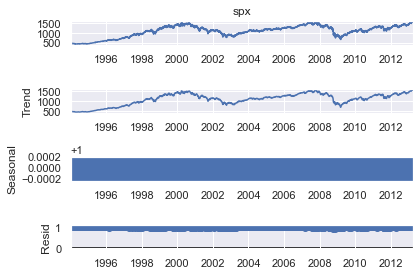

In [41]:
# plot each component in a seperate plot

s_dec.plot()

Autocorrelation:

The correlation between a sequence and itself

It messures the level of resemplence of a sequence from several periods ago and the actual data

ACF is a function that compares differente lagges

ACF

Text(0.5, 1.0, 'Autocorrelation of SPX')

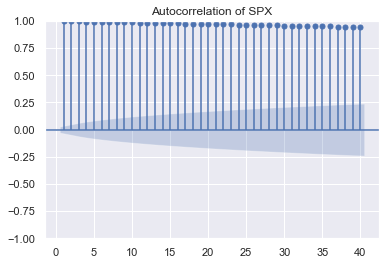

In [42]:
sgt.plot_acf(df['spx'], lags = 40, zero=False)
plt.title('Autocorrelation of SPX')

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_time_series_and_spectrum(data, fs, column=None):
    """
    This function takes a time series (either in a DataFrame column or as a NumPy array) and:
    1. Plots the time series.
    2. Computes and plots the Discrete-Time Fourier Transform (DTFT) of the series.
    
    Parameters:
        data (pd.DataFrame or np.ndarray): DataFrame with a time series column or a NumPy array.
        fs (float): Sampling rate (samples per unit time, e.g., samples per second).
        column (str, optional): The column name of the time series in the DataFrame, if using a DataFrame.
        
    Outputs:
        Two plots: Time series in the time domain and its frequency spectrum.
    """
    
    # Determine the type of data and extract the signal
    if isinstance(data, pd.DataFrame):
        if column is None:
            raise ValueError("If a DataFrame is provided, a column name must be specified.")
        signal = data[column].values  # Extract the column as a NumPy array
        label = column
    elif isinstance(data, np.ndarray):
        signal = data
        label = "Time Series"
    else:
        raise TypeError("Data should be a DataFrame or a NumPy array.")
    
    # Calculate the time vector based on the sampling rate
    n = len(signal)
    t = np.arange(n) / fs  # Time vector

    # Compute the DTFT (Discrete-Time Fourier Transform)
    frequencies = np.fft.fftfreq(n, 1 / fs)  # Frequency vector
    magnitude = np.abs(np.fft.fft(signal))  # Magnitude of the Fourier Transform

    # Plot time series and frequency spectrum
    plt.figure(figsize=(14, 6))

    # Plot time series in the time domain
    plt.subplot(1, 2, 1)
    plt.plot(t, signal)
    plt.title(f"Time Series ({label})")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")

    # Plot frequency spectrum (DTFT)
    plt.subplot(1, 2, 2)
    plt.plot(frequencies[:n // 2], magnitude[:n // 2])  # Only positive frequencies
    plt.title(f"Frequency Spectrum (DTFT) of {label}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")

    plt.tight_layout()
    plt.show()


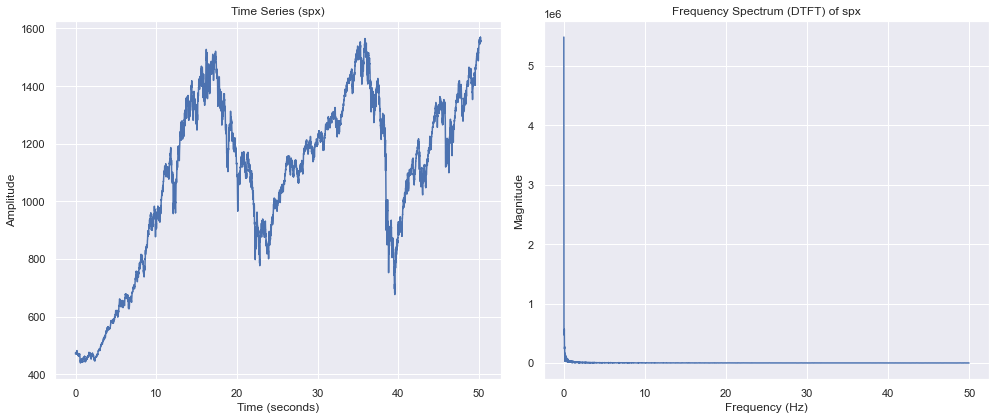

In [44]:
plot_time_series_and_spectrum(df, column='spx', fs=100)

In [45]:
np.random.seed(0)
time = pd.date_range('2022-01-01', periods=365)
seasonal = np.sin(2 * np.pi * np.arange(365) / 30)  # 30-day seasonality
trend = np.arange(365) / 365
noise = np.random.normal(0, 0.2, 365)
data = trend + seasonal + noise


In [121]:
import numpy as np
import matplotlib.pyplot as plt

def plot_time_series_and_spectrum(df, column, fs):
    """
    This function takes a DataFrame with a time series column and:
    1. Plots the time series.
    2. Computes and plots the Discrete-Time Fourier Transform (DTFT) of the series.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the time series data.
        column (str): The column name of the time series data in the DataFrame.
        fs (float): Sampling rate (samples per unit time, e.g., samples per second).
        
    Outputs:
        Two plots: Time series in the time domain and its frequency spectrum.
    """
    # Extract the time series data
    signal = df[column].values  # Get the time series data as a NumPy array
    n = len(signal)  # Length of the time series
    t = np.arange(n) / fs  # Time vector based on sampling rate
    
    # Compute the DTFT (Discrete-Time Fourier Transform)
    frequencies = np.fft.fftfreq(n, 1 / fs)  # Frequency vector
    magnitude = np.abs(np.fft.fft(signal))  # Magnitude of the Fourier Transform

    # Plot time series and frequency spectrum
    plt.figure(figsize=(14, 6))

    # Plot time series in the time domain
    plt.subplot(1, 2, 1)
    plt.plot(t, signal)
    plt.title(f"Time Series ({column})")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")

    # Plot frequency spectrum (DTFT)
    plt.subplot(1, 2, 2)
    plt.plot(frequencies[:n // 2], magnitude[:n // 2])  # Only positive frequencies
    plt.title(f"Frequency Spectrum (DTFT) of {column}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")

    plt.tight_layout()
    plt.show()


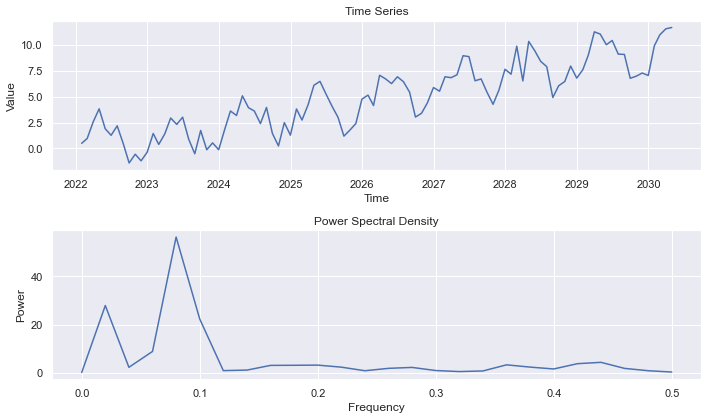

ACF of WN

Text(0.5, 1.0, 'Autocorrelation of WN')

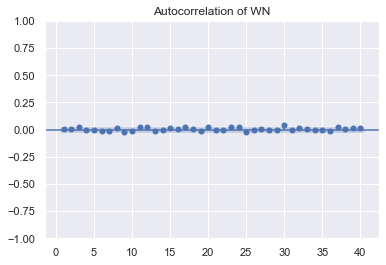

In [47]:
sgt.plot_acf(df['wn'], lags=40, zero=False)
plt.title('Autocorrelation of WN')

ACF for random walk

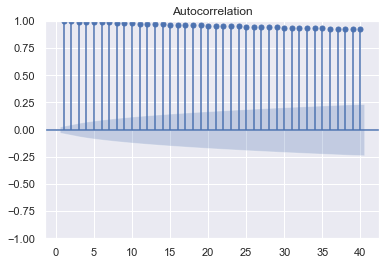

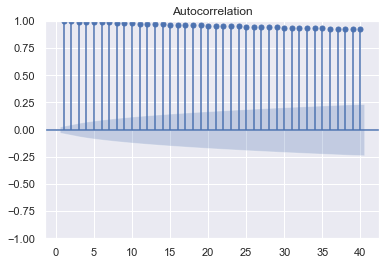

In [48]:
sgt.plot_acf(df['rw'], lags=40, zero=False)

ACF messures the direct and indirect relations between the lagged points and the current one, but if you want to calculate only the direct relation between the lagged point and the present instance we will use **PACF**

PACF

Text(0.5, 1.0, 'Partial Autocorrelation of SPX')

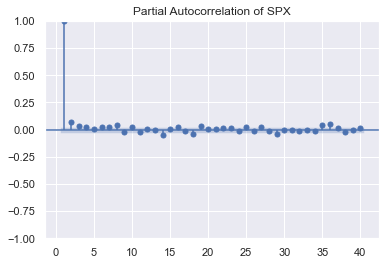

In [49]:
sgt.plot_pacf(df['spx'], lags=40, zero=False, method='ols')
plt.title('Partial Autocorrelation of SPX')

Selecting the model

log-likelihood Ratio test compares between models

information criteria:
AIC and BIC

AR model

A linear model, where current period values are a sum of past outcomes multiplied by a numeric factor

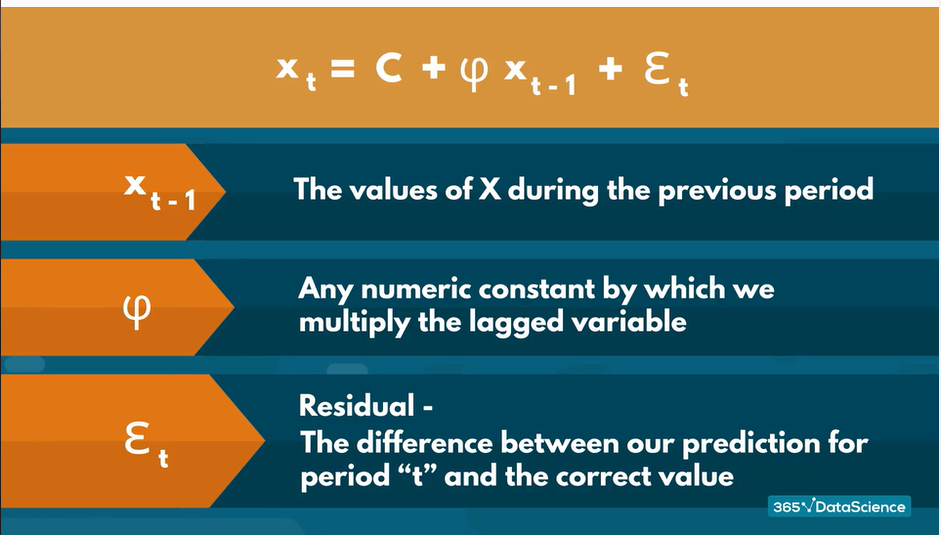

How many lags we should consider?

AR(2)

xt = C + k1.x(t-1) + k2.x(t-2) + E

MORE LAGS -> MORE COMPLICATED -> MORE COFFICIENTS -> MORE LIKELY NOT SIGNIFICANT

PACF

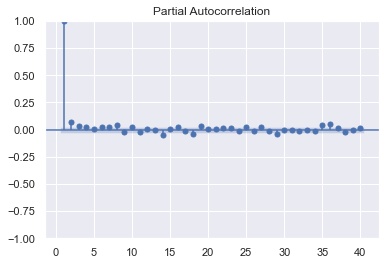

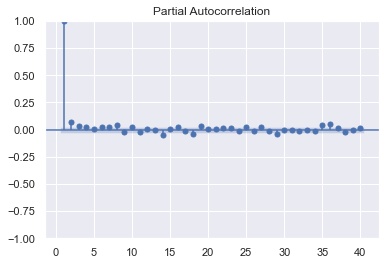

In [50]:
sgt.plot_pacf(df['spx'], lags=40, zero=False, method='ols')

ARMA

In [51]:
from statsmodels.tsa.arima.model import ARIMA

AR(1)

In [52]:
# use the FTSE data
ftse = raw_csv_data.dropna(subset=['ftse'])
ftse['date'] = pd.to_datetime(raw_csv_data['date'],dayfirst=  True)
ftse.set_index('date', inplace=True)

In [53]:
model_ar = ARIMA(ftse['ftse'], order=(1,0,0)) #(p, d, q)
model_ar_fit = model_ar.fit()

d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


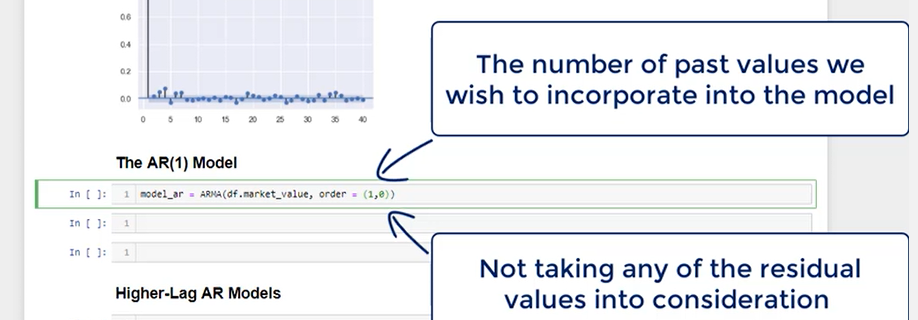

In [54]:
model_ar_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6269
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -34398.088
Date:                Sat, 16 Nov 2024   AIC                          68802.175
Time:                        03:05:36   BIC                          68822.406
Sample:                             0   HQIC                         68809.185
                               - 6269                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5422.7158    560.807      9.669      0.000    4323.554    6521.877
ar.L1          0.9990      0.001   1381.736      0.000       0.998       1.000
sigma2      3412.2963     36.295     94.015      0.000    3341.159    3483.434
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):              3639.31
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.19
Prob(H) (two-sided):                  0.20   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

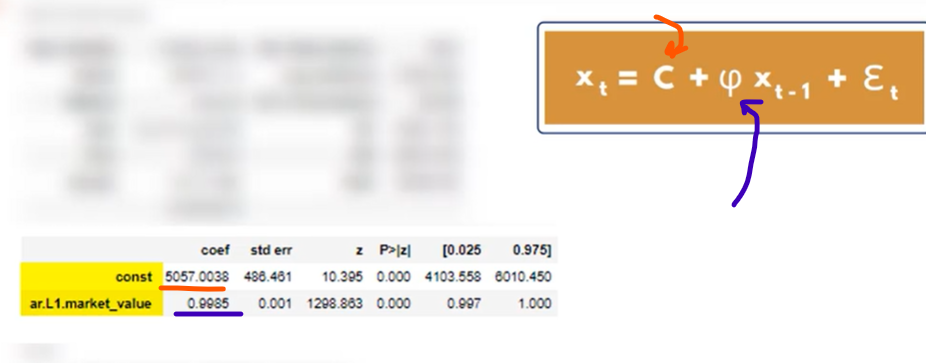

AR(2)

In [55]:
model_ar2 = ARIMA(ftse['ftse'], order=(2,0,0)) #(p, d, q)
model_ar_fit2 = model_ar2.fit()
model_ar_fit2.summary()

d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6269
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -34397.964
Date:                Sat, 16 Nov 2024   AIC                          68803.927
Time:                        03:05:37   BIC                          68830.901
Sample:                             0   HQIC                         68813.273
                               - 6269                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5422.7135    480.219     11.292      0.000    4481.502    6363.925
ar.L1          0.9904      0.009    112.841      0.000       0.973       1.008
ar.L2          0.0083      0.009      0.953      0.340      -0.009       0.026
sigma2      3411.8808     36.404     93.722      0.000    3340.530    3483.232
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3622.49
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.20
Prob(H) (two-sided):                  0.21   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
model_ar3 = ARIMA(ftse['ftse'], order=(3,0,0)) #(p, d, q)
model_ar_fit3 = model_ar3.fit()
model_ar_fit3.summary()

d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6269
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -34391.061
Date:                Sat, 16 Nov 2024   AIC                          68792.122
Time:                        03:05:38   BIC                          68825.839
Sample:                             0   HQIC                         68803.805
                               - 6269                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5422.7135    498.457     10.879      0.000    4445.757    6399.671
ar.L1          0.9900      0.009    112.150      0.000       0.973       1.007
ar.L2         -0.0382      0.012     -3.165      0.002      -0.062      -0.015
ar.L3          0.0470      0.008      5.675      0.000       0.031       0.063
sigma2      3404.7764     36.370     93.616      0.000    3333.493    3476.060
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3633.37
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.23
Prob(H) (two-sided):                  0.17   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

LLR Test

In [57]:
# import chi2 from stats
from scipy.stats import chi2

def LLR_test(model1, model2, DF=1):
    L1 = model1.fit().llf  # log likelihood of model1
    L2 = model2.fit().llf  # log likelihood of model2
    LLR = 2 * (L2 - L1)
    # print(f"L1: {L1}, L2: {L2}, LLR: {LLR}")  # debug print
    p = chi2.sf(LLR, DF).round(3)
    return p


In [58]:
LLR_test(model_ar, model_ar2)

0.618

The DF Test

In [59]:
sts.adfuller(ftse.ftse)

(-1.594282159794967,
 0.48646513020568727,
 6,
 6262,
 {'1%': -3.4313947113763845,
  '5%': -2.862001669939781,
  '10%': -2.5670157439442236},
 68396.51796279417)

Returns

In [60]:
ftse['returns'] = ftse.ftse.pct_change(1).mul(100)

In [61]:
ftse = ftse[1:]

In [62]:
sts.adfuller(ftse.returns)

(-15.182022490938994,
 6.178382600320818e-28,
 34,
 6233,
 {'1%': -3.4313995740622145,
  '5%': -2.8620038184370746,
  '10%': -2.567016887640913},
 19014.128593790985)

ACF and PACF for Returns

Text(0.5, 1.0, 'Autocorrelation of Returns')

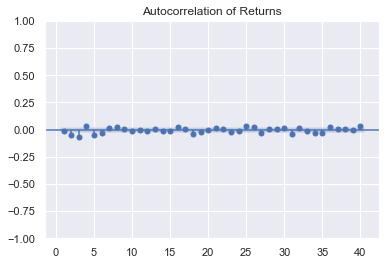

In [63]:
sgt.plot_acf(ftse.returns, lags = 40, zero=False)
plt.title('Autocorrelation of Returns')

Text(0.5, 1.0, 'Partial Autocorrelation of Returns')

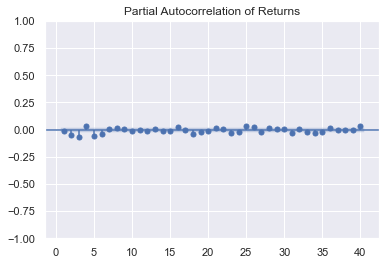

In [64]:
sgt.plot_pacf(ftse.returns, lags = 40, zero=False,method='ols') 
plt.title('Partial Autocorrelation of Returns')

AR(1) for Returns

In [65]:
ret_model = ARIMA(ftse.returns, order=(1,0,0))

d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [66]:
ret_model_result = ret_model.fit()

In [67]:
ret_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6268
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -9589.507
Date:                Sat, 16 Nov 2024   AIC                          19185.014
Time:                        03:05:40   BIC                          19205.244
Sample:                             0   HQIC                         19192.024
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.352      0.176      -0.009       0.047
ar.L1         -0.0172      0.008     -2.293      0.022      -0.032      -0.003
sigma2         1.2485      0.011    113.171      0.000       1.227       1.270
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10462.70
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Higher-Lag AR models for Returns

In [68]:
model_ret_ar_1 = ARIMA(ftse.returns, order=(2,0,0))
model_ret_ar_1_result = model_ret_ar_1.fit()
model_ret_ar_1_result.summary()

d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6268
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -9582.177
Date:                Sat, 16 Nov 2024   AIC                          19172.354
Time:                        03:05:40   BIC                          19199.327
Sample:                             0   HQIC                         19181.700
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.408      0.159      -0.007       0.045
ar.L1         -0.0181      0.008     -2.378      0.017      -0.033      -0.003
ar.L2         -0.0483      0.007     -6.948      0.000      -0.062      -0.035
sigma2         1.2456      0.011    112.639      0.000       1.224       1.267
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             10288.17
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
LLR_test(ret_model, model_ret_ar_1)

0.0

AR(3)

In [70]:
model_ret_ar_3 = ARIMA(ftse.returns, order=(3,0,0))
model_ret_ar_3_result = model_ret_ar_3.fit()
model_ret_ar_3_result.summary()

d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6268
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -9568.117
Date:                Sat, 16 Nov 2024   AIC                          19146.233
Time:                        03:05:41   BIC                          19179.949
Sample:                             0   HQIC                         19157.916
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.475      0.140      -0.006       0.044
ar.L1         -0.0213      0.008     -2.752      0.006      -0.036      -0.006
ar.L2         -0.0495      0.007     -7.162      0.000      -0.063      -0.036
ar.L3         -0.0669      0.007     -9.483      0.000      -0.081      -0.053
sigma2         1.2400      0.012    107.329      0.000       1.217       1.263
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              9316.21
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
LLR_test(model_ret_ar_1, model_ret_ar_3)

0.0

Normalizing VAlues

In [72]:
bench_mark = ftse.ftse.iloc[0]

In [73]:
ftse["norm"] = ftse.ftse.div(bench_mark).mul(100)

we always prefer to work with best stationary data, so time of dicky fuller test

In [74]:
sts.adfuller(ftse.norm)

(-1.5836220958886145,
 0.49181524913889874,
 6,
 6261,
 {'1%': -3.431394878305017,
  '5%': -2.8620017436944942,
  '10%': -2.567015783205618},
 24279.01581656079)

Normalizing Returns

In [75]:
bench_ret = ftse.returns.iloc[0]

In [76]:
ftse["norm_ret"] = ftse.returns.div(bench_ret).mul(100)

In [77]:
sts.adfuller(ftse.norm_ret)

(-15.182022490939017,
 6.178382600320238e-28,
 34,
 6233,
 {'1%': -3.4313995740622145,
  '5%': -2.8620038184370746,
  '10%': -2.567016887640913},
 99526.59564124081)

Analysing the Residuals

In [78]:
# AR(7) is the best

model_ar_7 = ARIMA(ftse.ftse, order=(7,0,0))
model_ar_7_result = model_ar_7.fit()
ftse['res_prices'] = model_ar_7_result.resid

d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [79]:
ftse.res_prices.mean()
# since the mean is close to 0, it means that the model is doing well

0.47896899399533877

In [80]:
ftse.res_prices.var()

4012.895334940852

In [81]:
sts.adfuller(ftse.res_prices)

(-85.97370952661439,
 0.0,
 0,
 6267,
 {'1%': -3.4313938775326336,
  '5%': -2.862001301519361,
  '10%': -2.5670155478252497},
 68374.54054581912)

Text(0.5, 1.0, 'Autocorrelation of Residuals')

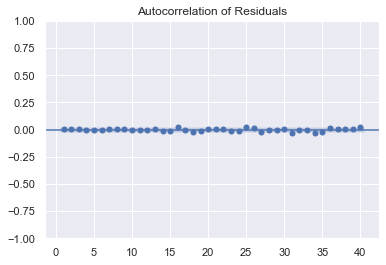

In [82]:
# Big plot
sgt.plot_acf(ftse.res_prices, lags=40, zero=False)
plt.title('Autocorrelation of Residuals')

<AxesSubplot:xlabel='date'>

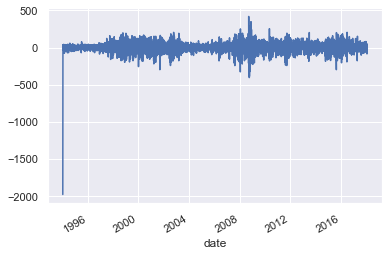

In [83]:
# plot the residuals
ftse.res_prices.plot()

In [84]:
model_ar_6 = ARIMA(ftse.returns, order=(6,0,0))
model_ar_6_result = model_ar_6.fit()
ftse['res_ret'] = model_ar_6_result.resid

d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [85]:
ftse.res_ret.mean()

-3.413200918344021e-05

In [86]:
ftse.res_ret.var()

1.233090553394668

In [87]:
sts.adfuller(ftse.res_ret)

(-79.12658123336784,
 0.0,
 0,
 6267,
 {'1%': -3.4313938775326336,
  '5%': -2.862001301519361,
  '10%': -2.5670155478252497},
 19012.246306021858)

Text(0.5, 1.0, 'Autocorrelation of Residuals')

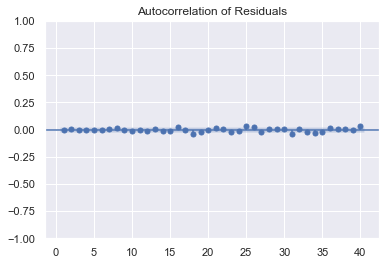

In [88]:
# ACF

sgt.plot_acf(ftse.res_ret, lags=40, zero=False)
plt.title('Autocorrelation of Residuals')

The moving average works well with the RW data


**The MA model includes past residuals, while the AR model includes past values.**




MA(1) for Returns

In [89]:
#
model_ret_1 = ARIMA(ftse.returns, order=(0,0,1)) # p d q
model_ret_1_result = model_ret_1.fit()
model_ret_1_result.summary()

d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6268
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -9589.405
Date:                Sat, 16 Nov 2024   AIC                          19184.811
Time:                        03:05:47   BIC                          19205.040
Sample:                             0   HQIC                         19191.820
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.354      0.176      -0.009       0.047
ma.L1         -0.0191      0.008     -2.549      0.011      -0.034      -0.004
sigma2         1.2484      0.011    113.094      0.000       1.227       1.270
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10444.74
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Heigher MA model

In [ ]:
model_ma_2 = ARIMA(ftse.returns, order=(0,0,2)) # p d q
model_ma_2_result = model_ma_2.fit()


d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



 LLR test p-value:  0.0


In [94]:
print(model_ma_2_result.summary())
print(f"\n LLR test p-value:  {LLR_test(model_ret_1, model_ma_2)}")


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6268
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -9581.725
Date:                Sat, 16 Nov 2024   AIC                          19171.450
Time:                        03:06:16   BIC                          19198.423
Sample:                             0   HQIC                         19180.797
                               - 6268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.417      0.157      -0.007       0.045
ma.L1         -0.0249      0.008     -3.268      0.001      -0.040      -0.010
ma.L2         -0.0486      0.007     -7.002      0.0

MA(3)

In [96]:
model_ma_3 = ARIMA(ftse.returns, order=(0,0,3)) # p d q
model_ma_3_result = model_ma_3.fit()
print(model_ma_3_result.summary())
print(f"\n LLR test p-value:  {LLR_test(model_ma_2, model_ma_3)}")



d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6268
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -9565.576
Date:                Sat, 16 Nov 2024   AIC                          19141.153
Time:                        03:09:38   BIC                          19174.869
Sample:                             0   HQIC                         19152.836
                               - 6268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.499      0.134      -0.006       0.044
ma.L1         -0.0172      0.008     -2.250      0.024      -0.032      -0.002
ma.L2         -0.0539      0.007     -7.691      0.0

after chekcing higher models... MA(8) is the best fit

In [113]:
def create_ARIMA_model(data, degree, comparison_model, degree_comparison=1):
    model = ARIMA(data, order=(0,0,degree)) # p d q
    model_result = model.fit()
    print(model_result.summary())
    print(f"\n LLR test p-value:  {LLR_test(comparison_model, model,degree_comparison)}")
    return model,model_result

In [114]:
model_ma_8, model_ma_8_result = create_ARIMA_model(ftse.returns,8, model_ma_3, 5)

d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\My Things\Eng. Things\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6268
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -9549.211
Date:                Sat, 16 Nov 2024   AIC                          19118.423
Time:                        03:50:09   BIC                          19185.855
Sample:                             0   HQIC                         19141.788
                               - 6268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.484      0.138      -0.006       0.044
ma.L1         -0.0194      0.008     -2.368      0.018      -0.036      -0.003
ma.L2         -0.0489      0.007     -6.785      0.0

Residuals for Returns

In [115]:
ftse["res_ret_ma_8"] = model_ma_8_result.resid[1:]

In [120]:
print(f"The mean of the residuals: {round(ftse.res_ret_ma_8.mean(),2)}\n The variance of the residuals: {round(ftse.res_ret_ma_8.var(), 2)}")

The mean of the residuals: -0.0
 The variance of the residuals: 1.23


In [91]:
from scipy.stats import norm

# Step 1: Define the sample data and null hypothesis parameters
sample_mean = 105      # Mean of our sample
population_mean = 100  # Mean under the null hypothesis
population_std = 15    # Standard deviation of the population
sample_size = 30       # Sample size

# Step 2: Calculate the Z-score
# Formula: Z = (sample_mean - population_mean) / (population_std / sqrt(sample_size))
z_score = (sample_mean - population_mean) / (population_std / (sample_size ** 0.5))

print("Calculated Z-score:", z_score)


Calculated Z-score: 1.8257418583505538


In [92]:

# Step 3: Set the significance level (alpha) and determine if it's a one- or two-tailed test
alpha = 0.05   # Commonly used significance level of 5%
two_tailed = True  # True if it's a two-tailed test, False if one-tailed

# Step 4: Find the critical Z-score(s)
if two_tailed:
    # Divide alpha by 2 for two tails
    critical_z = norm.ppf(1 - alpha / 2)
    rejection_region = (-critical_z, critical_z)
    print("Two-tailed test: Reject null hypothesis if Z-score is not within:", rejection_region)
else:
    # For a one-tailed test, the critical Z-score depends on the direction (positive tail here)
    critical_z = norm.ppf(1 - alpha)
    rejection_region = (-float('inf'), critical_z)  # Use (-inf, critical_z) if testing for a negative tail
    print("One-tailed test: Reject null hypothesis if Z-score is greater than:", critical_z)



Two-tailed test: Reject null hypothesis if Z-score is not within: (-1.959963984540054, 1.959963984540054)


In [93]:
# Step 5: Check if the calculated Z-score falls in the rejection region
if two_tailed:
    if z_score < -critical_z or z_score > critical_z:
        print("Z-score falls in the rejection region. Reject the null hypothesis.")
    else:
        print("Z-score does not fall in the rejection region. Do not reject the null hypothesis.")
else:
    if z_score > critical_z:
        print("Z-score falls in the rejection region. Reject the null hypothesis.")
    else:
        print("Z-score does not fall in the rejection region. Do not reject the null hypothesis.")

Z-score does not fall in the rejection region. Do not reject the null hypothesis.
